In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('melb_data.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,3/12/2016,2.5,3067,...,1,1.0,202,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019
1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,4/2/2016,2.5,3067,...,1,0.0,156,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019
2,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,4/3/2017,2.5,3067,...,2,0.0,134,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019
3,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,4/3/2017,2.5,3067,...,2,1.0,94,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019
4,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,4/6/2016,2.5,3067,...,1,2.0,120,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019


In [5]:
df = df.dropna()
df = df.select_dtypes(include=[np.number])
df

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
1,2,1035000,2.5,3067,2,1,0.0,156,79.00,1900.0,-37.80790,144.99340,4019
2,3,1465000,2.5,3067,3,2,0.0,134,150.00,1900.0,-37.80930,144.99440,4019
4,4,1600000,2.5,3067,3,1,2.0,120,142.00,2014.0,-37.80720,144.99410,4019
6,3,1876000,2.5,3067,4,2,0.0,245,210.00,1910.0,-37.80240,144.99930,4019
7,2,1636000,2.5,3067,2,1,2.0,256,107.00,1890.0,-37.80600,144.99540,4019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12205,3,601000,35.5,3757,3,2,1.0,972,149.00,1996.0,-37.51232,145.13282,2170
12206,3,1050000,6.8,3016,3,1,0.0,179,115.00,1890.0,-37.86558,144.90474,6380
12207,1,385000,6.8,3016,1,1,1.0,0,35.64,1967.0,-37.85588,144.89936,6380
12209,2,560000,4.6,3181,2,1,1.0,0,61.60,2012.0,-37.85581,144.99025,4380


In [7]:
X = df.drop(columns=['Price']).values
y = df['Price'].values.reshape(-1, 1)

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [11]:
def initialize_weights(n_features):
    w = np.zeros((n_features, 1))
    b = 0.0
    return w, b

def predict(X, w, b):
    return X @ w + b

def compute_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def compute_gradients(X, y_true, y_pred):
    m = len(y_true)
    dw = (-2/m) * X.T @ (y_true - y_pred)
    db = (-2/m) * np.sum(y_true - y_pred)
    return dw, db

In [13]:
def train_model(X, y, epochs=100, lr=0.01, momentum=False, beta=0.9):
    n_features = X.shape[1]
    w, b = initialize_weights(n_features)
    
    vw, vb = np.zeros_like(w), 0  
    
    losses = []
    
    for epoch in range(epochs):
        y_pred = predict(X, w, b)
        loss = compute_loss(y, y_pred)
        losses.append(loss)
        
        dw, db = compute_gradients(X, y, y_pred)

        if momentum:
            vw = beta * vw + (1 - beta) * dw
            vb = beta * vb + (1 - beta) * db
            w -= lr * vw
            b -= lr * vb
        else:
            w -= lr * dw
            b -= lr * db
    
    return w, b, losses

In [15]:
w_gd, b_gd, loss_gd = train_model(X_train, y_train, momentum=False)
w_mom, b_mom, loss_mom = train_model(X_train, y_train, momentum=True)


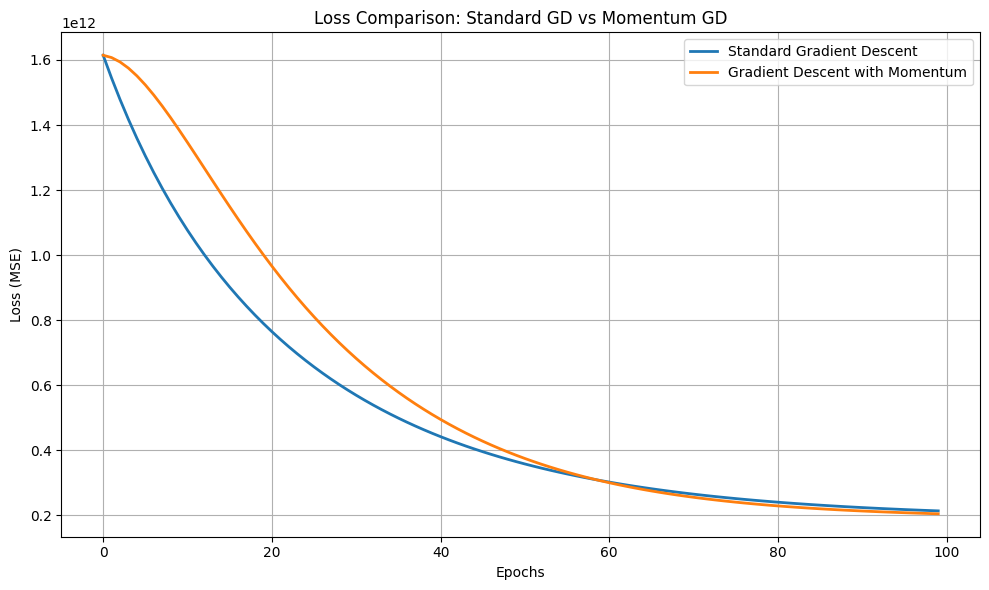

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(loss_gd, label='Standard Gradient Descent', linewidth=2)
plt.plot(loss_mom, label='Gradient Descent with Momentum', linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Loss Comparison: Standard GD vs Momentum GD')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()